# **Predictive Modeling for High-Cost Drugs and Medicaid Spending Forecasting Using Drug Utilization Data**

## Objectives

### Main Objective:
- **To develop a predictive model for identifying high-cost drugs and forecasting Medicaid spending using drug utilization data.**

### Specific Objectives:
1. **Identify and predict the most expensive drugs based on Medicaid reimbursement data.**
    - This objective aims to predict which drugs will have the highest reimbursement costs based on past data, helping to identify high-cost drugs for better budgeting.

2. **Analyze the distribution of drug popularity (prescription count) and its relationship with reimbursement spending.**
    - Explore how the number of prescriptions for each drug correlates with the total reimbursement spending, providing insights into the relationship between drug popularity and cost.

3. **Examine state-level variations in drug use and spending patterns to identify key cost drivers.**
    - Investigate how drug use and spending differ across states to identify regional patterns and key factors influencing Medicaid spending, supporting more targeted forecasting.

4. **Provide actionable insights for optimizing Medicaid spending based on predictive models of drug costs.**
    - Use the insights and predictions from the models to recommend actionable strategies for controlling and optimizing Medicaid spending on prescription drugs.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Medicaid_data.csv")
df.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Suppression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
0,FFSU,AK,2143380,2,1433,80,2025,2,False,TRULICITY,216.0,107.0,102976.40,98630.87,4345.53
1,FFSU,AK,2143480,2,1434,80,2025,2,False,TRULICITY,218.0,109.0,104481.92,101806.64,2675.28
2,FFSU,AK,2143611,2,1436,11,2025,2,False,EMGALITY P,21.0,20.0,15227.25,15227.25,0.00
3,FFSU,AK,2144511,2,1445,11,2025,2,False,TALTZ AUTO,33.0,30.0,231532.28,231532.28,0.00
4,FFSU,AK,2145780,2,1457,80,2025,2,False,MOUNJARO,208.0,104.0,108908.80,105953.32,2955.48


In [3]:
df.columns

Index(['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Suppression Used', 'Product Name',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed'],
      dtype='object')

In [4]:
import re


df["Product Name_raw"] = df["Product Name"]

def clean_product_name(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()                 
    x = re.sub(r"\s+", " ", x)        
    x = x.casefold()                   
    return x

df["Product Name_std"] = df["Product Name_raw"].apply(clean_product_name)


In [5]:
# High cost and low cost drugs
drug_cost = df.groupby('Product Name_std')['Total Amount Reimbursed'].sum().reset_index()
drug_cost = drug_cost.sort_values(by='Total Amount Reimbursed', ascending=False)

In [6]:
high_cost_drugs = drug_cost.head(10)
high_cost_drugs

,Product Name_std,Total Amount Reimbursed
906,biktarvy,3.128179e+09
3766,jardiance,2.450348e+09
3434,humira pen,2.253603e+09
7338,trulicity,1.989183e+09
3662,invega sus,1.772232e+09
2125,dupixent s,1.675423e+09
2232,eliquis,1.300854e+09
7743,vraylar (c,1.169762e+09
8102,zepbound,1.116446e+09
5554,ozempic 0.,1.101627e+09


In [7]:
low_cost_drugs = drug_cost[drug_cost['Total Amount Reimbursed']> 0].tail(10)
low_cost_drugs

,Product Name_std,Total Amount Reimbursed
3362,heparin 12,4.33
6348,rocephin,3.56
5907,prevduo 3,3.00
2118,duoneb (ip,1.50
16,0.9% w/v s,1.29
251,akovaz 50m,1.19
1921,diflucan,1.00
4195,ldr witch,0.84
7854,witch haze,0.84
3830,junior str,0.35


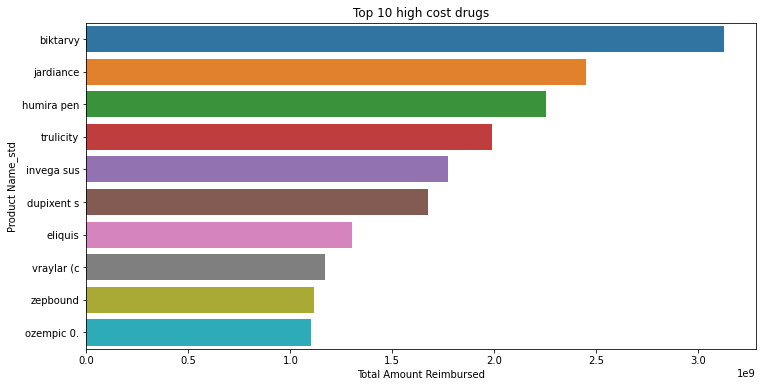

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=high_cost_drugs, x="Total Amount Reimbursed", y="Product Name_std")
plt.title('Top 10 high cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name_std')
plt.show()

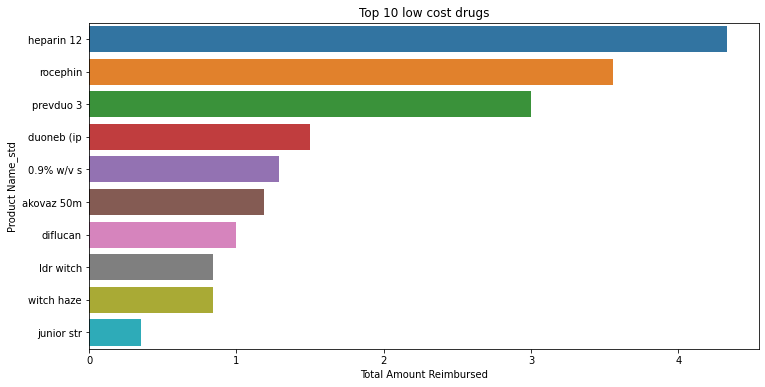

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data=low_cost_drugs, x="Total Amount Reimbursed", y="Product Name_std")
plt.title('Top 10 low cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name_std')
plt.show()

In [10]:
# Most popular drugs
drug_popularity = df.groupby('Product Name_std')['Number of Prescriptions'].sum().reset_index()
drug_popularity = drug_popularity.sort_values(by='Number of Prescriptions', ascending=False)

In [11]:
most_pop_drugs = drug_popularity.head(10)
most_pop_drugs

,Product Name_std,Number of Prescriptions
443,amoxicilli,16393953.0
288,albuterol,14228790.0
3513,ibuprofen,13282879.0
2863,fluticason,12077923.0
2999,gabapentin,11940150.0
647,atorvastat,11829121.0
5383,ondansetro,11260275.0
1272,cetirizine,10074761.0
4654,metformin,9337839.0
6538,sertraline,8974972.0


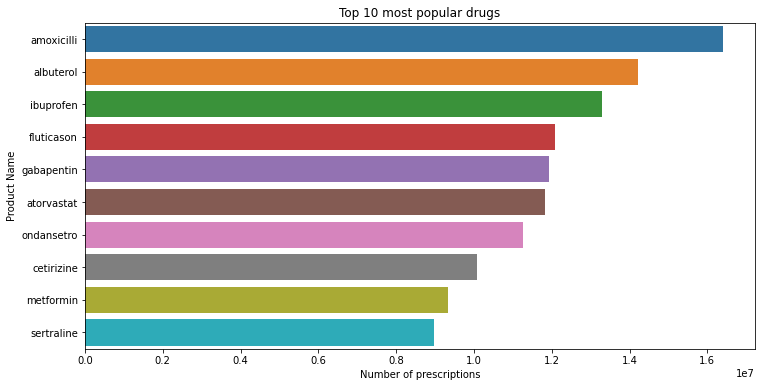

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=most_pop_drugs, x="Number of Prescriptions", y="Product Name_std")
plt.title('Top 10 most popular drugs')
plt.xlabel("Number of prescriptions")
plt.ylabel('Product Name')
plt.show()

In [13]:
state_drug_use = df.groupby('State')["Units Reimbursed"].sum().reset_index().sort_values(by='Units Reimbursed', ascending=False)
state_spending = df.groupby("State")['Total Amount Reimbursed'].sum().reset_index().sort_values(by="Total Amount Reimbursed", ascending=False)

In [14]:
state_drug_use.head(10)

,State,Units Reimbursed
52,XX,2.320929e+10
4,CA,3.211247e+09
34,NY,2.403084e+09
35,OH,1.157968e+09
38,PA,1.060265e+09
44,TX,9.982072e+08
27,NC,8.075003e+08
22,MI,7.758629e+08
14,IL,7.165588e+08
9,FL,7.026974e+08


In [15]:
state_spending.head(10)

,State,Total Amount Reimbursed
52,XX,5.644606e+10
4,CA,8.143485e+09
34,NY,6.078539e+09
38,PA,2.644197e+09
35,OH,2.293810e+09
27,NC,2.265033e+09
22,MI,1.934683e+09
44,TX,1.749445e+09
14,IL,1.652224e+09
9,FL,1.643099e+09


In [16]:
# Remove the national/suppressed "XX" row
df = df[df['State'] != 'XX'].copy()
print("Dataset shape after removing XX:", df.shape)
print("Remaining states:", sorted(df['State'].unique()))

Dataset shape after removing XX: (1194315, 17)
Remaining states: ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


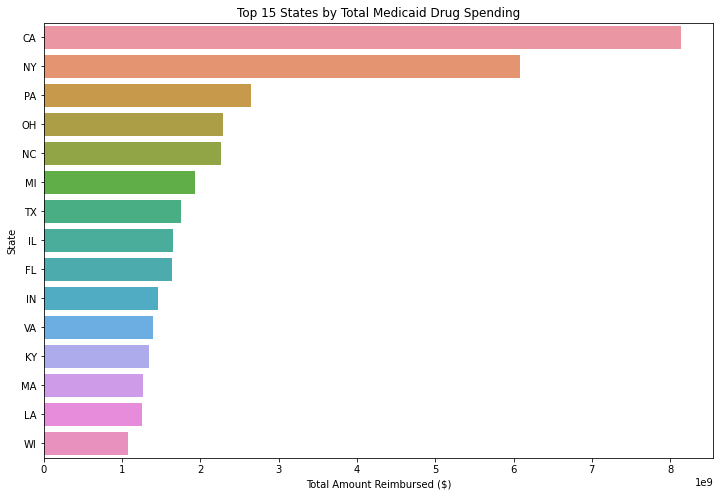

In [17]:
# State spending bar plot (after removing XX)
state_spending = df.groupby('State')['Total Amount Reimbursed'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=state_spending.head(15).values, y=state_spending.head(15).index)
plt.title('Top 15 States by Total Medicaid Drug Spending')
plt.xlabel('Total Amount Reimbursed ($)')
plt.show()

In [18]:
df.shape

(1194315, 17)

In [19]:
df.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Suppression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Product Name_raw,Product Name_std
0,FFSU,AK,2143380,2,1433,80,2025,2,False,TRULICITY,216.0,107.0,102976.40,98630.87,4345.53,TRULICITY,trulicity
1,FFSU,AK,2143480,2,1434,80,2025,2,False,TRULICITY,218.0,109.0,104481.92,101806.64,2675.28,TRULICITY,trulicity
2,FFSU,AK,2143611,2,1436,11,2025,2,False,EMGALITY P,21.0,20.0,15227.25,15227.25,0.00,EMGALITY P,emgality p
3,FFSU,AK,2144511,2,1445,11,2025,2,False,TALTZ AUTO,33.0,30.0,231532.28,231532.28,0.00,TALTZ AUTO,taltz auto
4,FFSU,AK,2145780,2,1457,80,2025,2,False,MOUNJARO,208.0,104.0,108908.80,105953.32,2955.48,MOUNJARO,mounjaro


In [20]:
df.columns

Index(['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Suppression Used', 'Product Name',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed', 'Product Name_raw',
       'Product Name_std'],
      dtype='object')

In [27]:
# Calculate the 90th percentile threshold for high-cost drugs
threshold = df["Total Amount Reimbursed"].quantile(0.90)
print("High-cost threshold:", threshold)

# Create the 'high_cost' binary target: 1 if high-cost, 0 otherwise
df["high_cost"] = (df["Total Amount Reimbursed"] >= threshold).astype(int)

# Check the distribution of the 'high_cost' label
print(df["high_cost"].value_counts(normalize=True))


High-cost threshold: 26038.12200000002
high_cost
0    0.9
1    0.1
Name: proportion, dtype: float64


In [28]:
X = df[[
    "State",
    "Product Name_std",
    "Quarter",
    "Units Reimbursed",
    "Number of Prescriptions"
]]

y = df["high_cost"]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (1194315, 5)
Target (y) shape: (1194315,)


In [29]:
from sklearn.model_selection import train_test_split

# Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # Ensure the class distribution is preserved
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (955452, 5)
Test shape: (238863, 5)


In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numeric features
categorical_features = ["State", "Product Name_std", "Quarter"]
numeric_features = ["Units Reimbursed", "Number of Prescriptions"]

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


# Logistic Regression for High-Cost Drug Classification
## Objective:
Classify high-cost Medicaid drugs (top 10% by reimbursement) to help identify financial risks.

In [31]:
from sklearn.linear_model import LogisticRegression

# Build the pipeline with preprocessing + logistic regression model
pipeline_lr = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    214977
           1       0.60      0.92      0.73     23886

    accuracy                           0.93    238863
   macro avg       0.80      0.93      0.84    238863
weighted avg       0.95      0.93      0.94    238863



## Model Performance:
- **Precision**: 0.60  
  60% of predicted high-cost drugs are actually high-cost.

- **Recall**: 0.92  
  92% of actual high-cost drugs were identified by the model.

- **F1-Score**: 0.73  
  A balanced score between precision and recall.

- **Accuracy**: 0.93  
  Overall model accuracy, though less informative due to class imbalance.

## Class Imbalance:
- The dataset is imbalanced (90% non-high-cost vs 10% high-cost drugs), but the model effectively detects high-cost drugs with a high recall.

## Next Steps:
- **Threshold Tuning**: Adjust the threshold to improve recall.
- **Model Comparison**: Explore Random Forest or XGBoost for potential improvements.

This model demonstrates strong potential for identifying high-cost drugs, crucial for Medicaid budget forecasting.

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get probabilities for the positive class (class 1)
y_prob = pipeline_lr.predict_proba(X_test)[:, 1]

# Try different thresholds
for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    y_pred_t = (y_prob >= t).astype(int)
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"threshold={t:.1f} | precision={p:.2f} recall={r:.2f} f1={f1:.2f}")


threshold=0.1 | precision=0.27 recall=0.99 f1=0.42
threshold=0.2 | precision=0.38 recall=0.98 f1=0.55
threshold=0.3 | precision=0.47 recall=0.96 f1=0.63
threshold=0.4 | precision=0.54 recall=0.94 f1=0.69
threshold=0.5 | precision=0.60 recall=0.92 f1=0.73


## Key Insights:
- **Recall improves significantly** as the threshold is lowered, which means the model detects more high-cost drugs.
- **Precision increases** with higher thresholds, but at the cost of missing some high-cost drugs.
- **F1-Score** reaches its best balance at **0.5**, where precision and recall are optimal.

## Next Steps:
- Further evaluate using **Random Forest** or **XGBoost** for comparison.
- Consider **precision-recall curve** for additional threshold analysis.

This model is effective in identifying high-cost drugs, and with threshold tuning, we can optimize for more accurate risk detection.

# **Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with preprocessing and Decision Tree model
pipeline_dt = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=10,          # Controls the depth of the tree to avoid overfitting
        class_weight="balanced",  # Addressing the class imbalance
        random_state=42
    ))
])

# Fit the model
pipeline_dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.95      0.84      0.89    214977
           1       0.29      0.61      0.40     23886

    accuracy                           0.81    238863
   macro avg       0.62      0.72      0.64    238863
weighted avg       0.89      0.81      0.84    238863



### Decision Tree Model Performance:
- **Precision for class 1 (high-cost drugs)**: **0.29**  
  29% of predicted high-cost drugs are actually high-cost.

- **Recall for class 1**: **0.61**  
  61% of actual high-cost drugs are identified by the model.

- **F1-Score for class 1**: **0.40**  
  Balance between precision and recall for high-cost drug detection.

- **Accuracy**: **0.81**  
  High accuracy due to class imbalance, but not informative by itself.

### Key Insights:
- **High Recall (0.61)**: The model is fairly effective at identifying high-cost drugs.
- **Low Precision (0.29)**: The model has a relatively high false positive rate for high-cost drugs.
- **F1-Score**: Shows a tradeoff between recall and precision; still room for improvement.

### Next Steps:
- **Hyperparameter Tuning**: Adjust **max_depth**, **min_samples_split**, etc., to improve performance.
- **Try XGBoost**: Explore XGBoost for faster, more powerful classification with better handling of class imbalance.

## Hyperparameter Tuning for Decision Tree

In [34]:
pipeline_dt_tuned = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=20,  # Try deeper trees
        min_samples_split=10,  # More data points needed for a split
        class_weight="balanced",
        random_state=42
    ))
])

pipeline_dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = pipeline_dt_tuned.predict(X_test)

print(classification_report(y_test, y_pred_dt_tuned))


              precision    recall  f1-score   support

           0       0.96      0.87      0.91    214977
           1       0.35      0.65      0.46     23886

    accuracy                           0.84    238863
   macro avg       0.65      0.76      0.68    238863
weighted avg       0.90      0.84      0.86    238863



### Performance:
- **Precision for class 1 (high-cost drugs)**: **0.35**  
  35% of predicted high-cost drugs are actually high-cost.

- **Recall for class 1**: **0.65**  
  65% of actual high-cost drugs are identified.

- **F1-Score for class 1**: **0.46**  
  Balance between precision and recall for high-cost drug detection.

- **Accuracy**: **0.84**  
  Model performance with class imbalance.

### Key Insights:
- **Recall improvement (0.65)**: Better identification of high-cost drugs compared to the baseline.
- **Precision tradeoff (0.35)**: Higher recall comes at the cost of increased false positives.

### Next Steps:
- **Try XGBoost**: Further improvements by leveraging tree-based models with better handling of class imbalance.

# **XGBoost**

In [35]:
from xgboost import XGBClassifier

# Calculate the imbalance ratio for scale_pos_weight
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print("scale_pos_weight:", pos_weight)

# Build the pipeline with preprocessing + XGBoost model
pipeline_xgb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=pos_weight,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

# Train the model
pipeline_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = pipeline_xgb.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))


scale_pos_weight: 8.999916270696836


c:\Users\Fred\Conda1\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [09:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.84      0.90    214977
           1       0.33      0.69      0.45     23886

    accuracy                           0.83    238863
   macro avg       0.65      0.77      0.67    238863
weighted avg       0.90      0.83      0.85    238863



### XGBoost Model Performance:
- **Precision for class 1 (high-cost drugs)**: **0.33**  
  33% of predicted high-cost drugs are actually high-cost.

- **Recall for class 1**: **0.69**  
  The model identifies 69% of actual high-cost drugs.

- **F1-Score for class 1**: **0.45**  
  A balanced score between precision and recall for high-cost drug detection.

- **Accuracy**: **0.83**  
  Overall model accuracy with class imbalance considered.

### Key Insights:
- **Recall improvement (0.69)**: The model is more effective at detecting high-cost drugs compared to Decision Trees.
- **Precision tradeoff (0.33)**: The model is predicting more high-cost drugs, but still has a relatively high false positive rate.

### Next Steps:
- **Hyperparameter Tuning**: Experiment with tuning parameters (max_depth, n_estimators, learning_rate) to improve performance.
- **Threshold Tuning**: Adjust threshold to optimize recall.

## Tuned XGBoost

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter distribution for randomized search
param_dist = {
    'model__max_depth': [3, 6, 10],  # Depth of the tree
    'model__n_estimators': [50, 100],  # Fewer trees to speed up the process
    'model__learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'model__subsample': [0.8, 1.0],  # Subsample ratio
    'model__colsample_bytree': [0.8, 1.0]  # Proportion of features used
}

# Set up the pipeline for randomized search
pipeline_xgb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", XGBClassifier(
        scale_pos_weight=pos_weight,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

# Set up RandomizedSearchCV with fewer iterations for faster results
random_search = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2,
    scoring='accuracy',  # Optimize for accuracy
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and model
print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_

# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Fred\Conda1\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.3, 'model__colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       0.98      0.88      0.93    214977
           1       0.44      0.84      0.58     23886

    accuracy                           0.88    238863
   macro avg       0.71      0.86      0.75    238863
weighted avg       0.93      0.88      0.89    238863



### XGBoost Model Performance:
- **Precision for class 1 (high-cost drugs)**: **0.44**  
  44% of predicted high-cost drugs are actually high-cost.

- **Recall for class 1**: **0.84**  
  The model identifies 84% of actual high-cost drugs.

- **F1-Score for class 1**: **0.58**  
  A balanced score between precision and recall for high-cost drug detection.

- **Accuracy**: **0.88**  
  Overall model accuracy with class imbalance considered.

### Key Insights:
- **Recall improvement (0.84)**: XGBoost has significantly improved recall, flagging more high-cost drugs than previous models.
- **Precision tradeoff (0.44)**: The model has a higher rate of false positives compared to recall, but can still be improved with threshold tuning.
